In [79]:
import pymysql
import pandas as pd
database_name = 'strawberry2'

# MySQL 데이터베이스 연결 함수
def create_connection():
    connection = pymysql.connect(
        host='127.0.0.1',
        user='root',
        password='mysql904#',  # 비밀번호를 실제 비밀번호로 바꾸세요
        db= database_name,    # 실제 데이터베이스 이름으로 변경하세요
        charset='utf8'
    )
    return connection

# 데이터베이스에서 데이터 가져오기
def fetch_data_from_db(connection, table_name):
    query = f"SELECT * FROM {table_name}"
    with connection.cursor() as cursor:
        cursor.execute(query)
        result = cursor.fetchall()

        # 컬럼 이름 가져오기
        columns = [col[0] for col in cursor.description]
        
    # pandas DataFrame으로 변환
    smartfarm_df = pd.DataFrame(result, columns=columns)
    return smartfarm_df

# 데이터베이스 연결
connection = create_connection()

# 테이블 이름 지정
table_name = 'smartfarm_data2020_1'

# 데이터를 가져와서 pandas DataFrame으로 변환
df = fetch_data_from_db(connection, table_name)



# 연결 종료
connection.close()

In [39]:
def create_connection():
    connection = pymysql.connect(
        host='127.0.0.1',
        user='root',
        password='mysql904#',  # 비밀번호를 실제 비밀번호로 바꾸세요
        db= database_name,    # 실제 데이터베이스 이름으로 변경하세요
        charset='utf8'
    )
    return connection

# 데이터베이스에서 데이터 가져오기
def fetch_data_from_db(connection, table_name):
    query = f"SELECT * FROM {table_name}"
    with connection.cursor() as cursor:
        cursor.execute(query)
        result = cursor.fetchall()

        # 컬럼 이름 가져오기
        columns = [col[0] for col in cursor.description]
        
    # pandas DataFrame으로 변환
    smartfarm_df = pd.DataFrame(result, columns=columns)
    return smartfarm_df

database_name = 'strawberry2'
table_name = 'smartfarm_data2020_2'
connection = create_connection()

df2 = fetch_data_from_db(connection, table_name)

connection.close()

In [102]:
def create_connection():
    connection = pymysql.connect(
        host='127.0.0.1',
        user='root',
        password='mysql904#',  # 비밀번호를 실제 비밀번호로 바꾸세요
        db= database_name,    # 실제 데이터베이스 이름으로 변경하세요
        charset='utf8'
    )
    return connection

# 데이터베이스에서 데이터 가져오기
def fetch_data_from_db(connection, table_name):
    query = f"SELECT * FROM {table_name}"
    with connection.cursor() as cursor:
        cursor.execute(query)
        result = cursor.fetchall()

        # 컬럼 이름 가져오기
        columns = [col[0] for col in cursor.description]
        
    # pandas DataFrame으로 변환
    smartfarm_df = pd.DataFrame(result, columns=columns)
    return smartfarm_df

database_name = 'strawberry2'
table_name = 'smartfarm_data2020_3'
connection = create_connection()

df3 = fetch_data_from_db(connection, table_name)

connection.close()

In [42]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
df

,id,농가명,측정시간,도,시군,품목,작기,온도_내부,상대습도_내부
0,1,51,2020-09-12 00:00:00,경남,거창,딸기,1,19.8,99.9
1,2,51,2020-09-12 01:00:00,경남,거창,딸기,1,19.4,99.2
2,3,51,2020-09-12 02:00:00,경남,거창,딸기,1,19.5,99.3
3,4,51,2020-09-12 03:00:00,경남,거창,딸기,1,19.0,99.7
4,5,51,2020-09-12 04:00:00,경남,거창,딸기,1,18.6,99.9
...,...,...,...,...,...,...,...,...,...
270738,270739,1,2021-04-23 20:00:00,충북,청주,딸기,1,17.2,46.4
270739,270740,1,2021-04-23 21:00:00,충북,청주,딸기,1,17.2,42.6
270740,270741,1,2021-04-23 22:00:00,충북,청주,딸기,1,16.6,44.2
270741,270742,1,2021-04-23 23:00:00,충북,청주,딸기,1,16.1,44.4


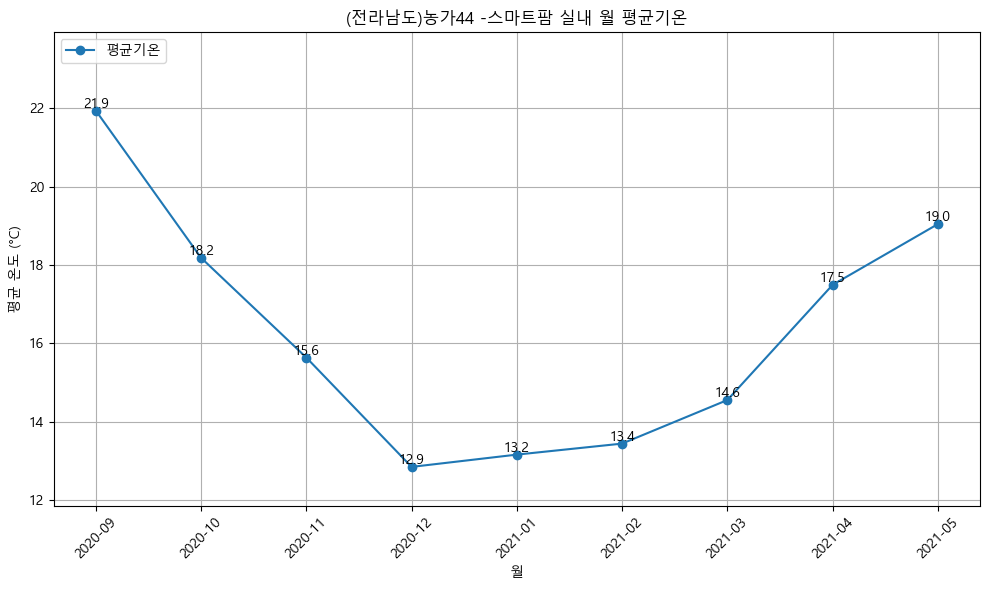

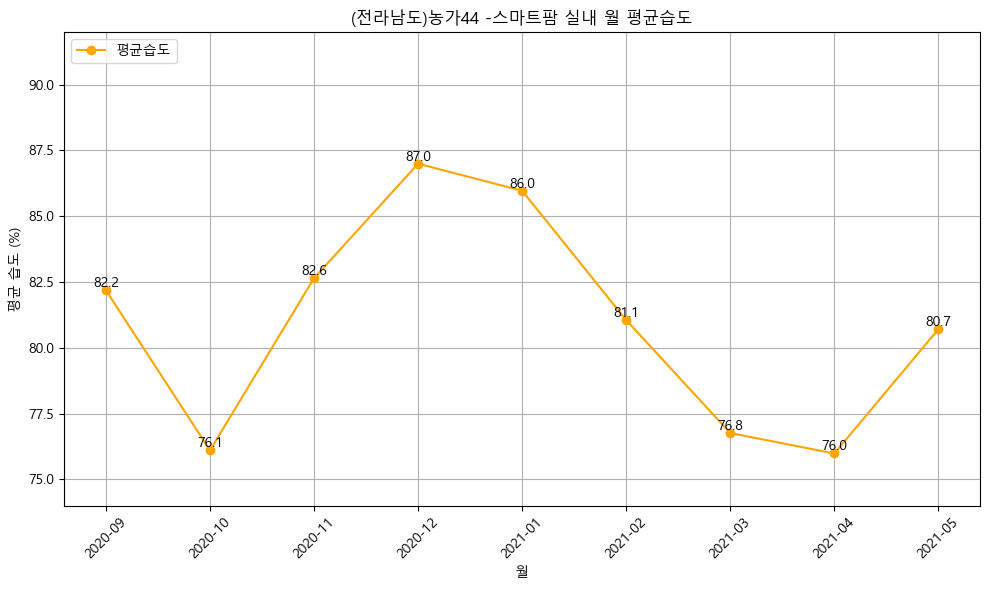

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# '일시' 컬럼을 datetime 형식으로 변환 (필요시)
df['측정시간'] = pd.to_datetime(df['측정시간'])

def plot_avg_temp_and_humidity_by_farm(farm_name):
    # 특정 농가명으로 필터링
    farm_weather = df[df['농가명'] == farm_name]

    # 2020년 1월부터 2021년 12월까지의 데이터만 필터링
    start_date = '2020-01-01'
    end_date = '2021-12-31'
    farm_weather = farm_weather[(farm_weather['측정시간'] >= start_date) & (farm_weather['측정시간'] <= end_date)]

    # 월별로 데이터 쪼개기 및 월별 평균 온도/습도 계산
    farm_weather['월'] = farm_weather['측정시간'].dt.to_period('M')
    monthly_avg_temp = farm_weather.groupby('월')['온도_내부'].mean()
    monthly_avg_humidity = farm_weather.groupby('월')['상대습도_내부'].mean()
    
    # 월별 평균 온도 그래프
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_avg_temp.index.astype(str), monthly_avg_temp.values, marker='o',label='평균기온')
    
    # 각 점에 값 표시
    for i, v in enumerate(monthly_avg_temp.values):
        plt.text(i, v, f"{v:.1f}", ha='center', va='bottom')
    
    plt.title(f'(전라남도)농가{farm_name} -스마트팜 실내 월 평균기온')
    plt.xlabel('월')
    plt.ylabel('평균 온도 (°C)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.ylim(bottom=monthly_avg_temp.min() - 1, top=monthly_avg_temp.max() + 2)
    plt.legend(loc='upper left')
    plt.tight_layout()
    
    # 그래프 저장
    plt.savefig(f'농가{farm_name}_월평균기온.png')
    plt.show()

    # 월별 평균 습도 그래프
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_avg_humidity.index.astype(str), monthly_avg_humidity.values, marker='o',label='평균습도',color="orange")
    
    # 각 점에 값 표시
    for i, v in enumerate(monthly_avg_humidity.values):
        plt.text(i, v, f"{v:.1f}", ha='center', va='bottom')
    
    plt.title(f'(전라남도)농가{farm_name} -스마트팜 실내 월 평균습도')
    plt.xlabel('월')
    plt.ylabel('평균 습도 (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.ylim(bottom=monthly_avg_humidity.min() - 2, top=monthly_avg_humidity.max() + 5)
    plt.legend(loc='upper left')
    plt.tight_layout()

    # 그래프 저장
    plt.savefig(f'농가{farm_name}_월평균습도.png')
    plt.show()

# 예시: 농가명이 1인 경우 실행
plot_avg_temp_and_humidity_by_farm(44)

In [13]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

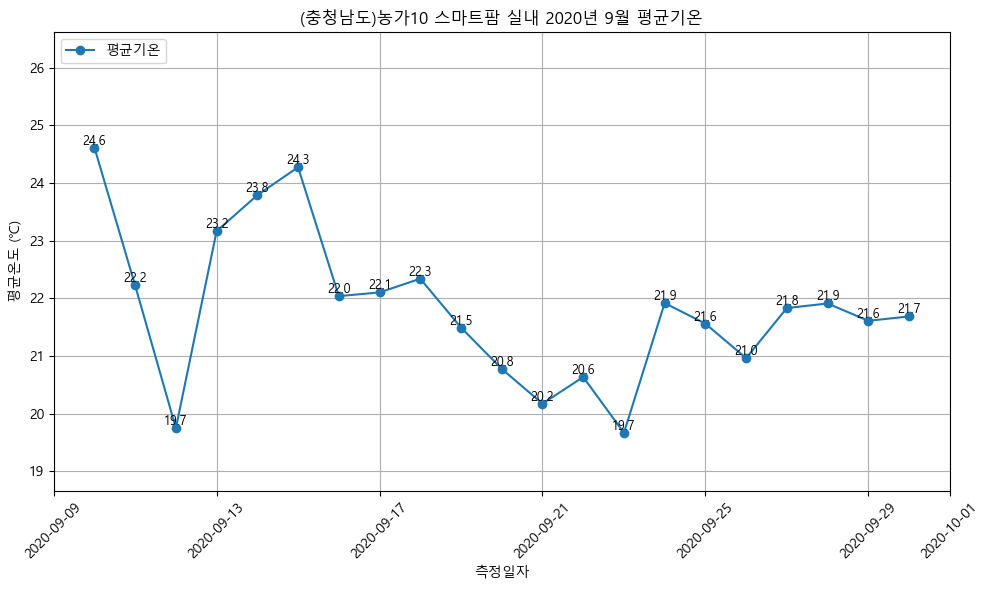

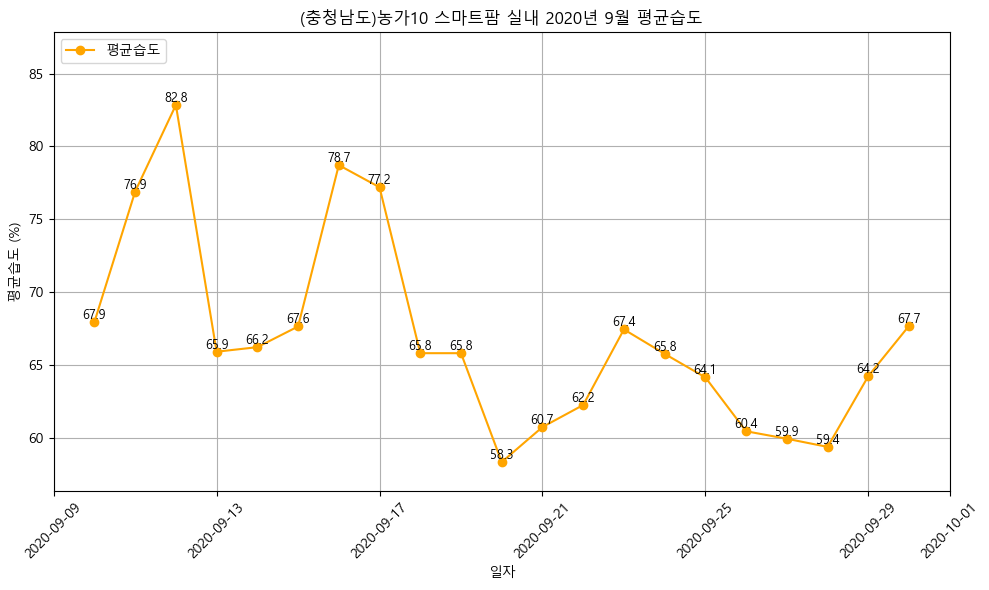

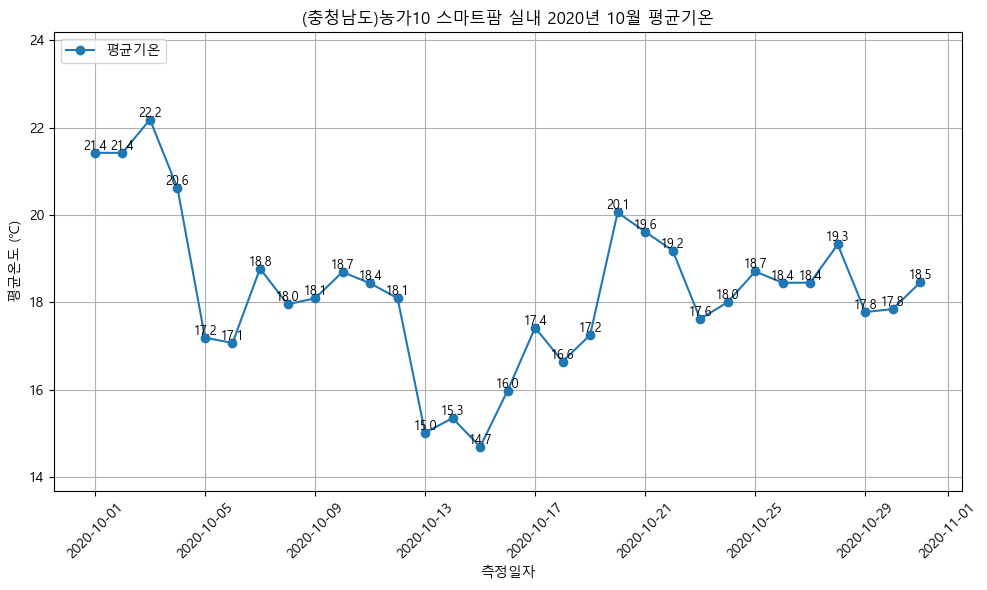

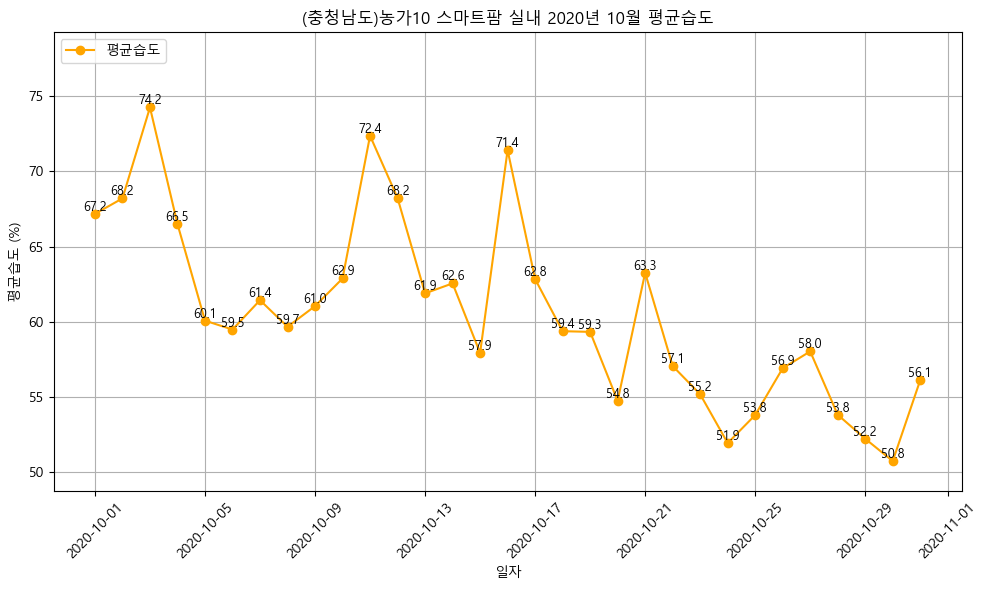

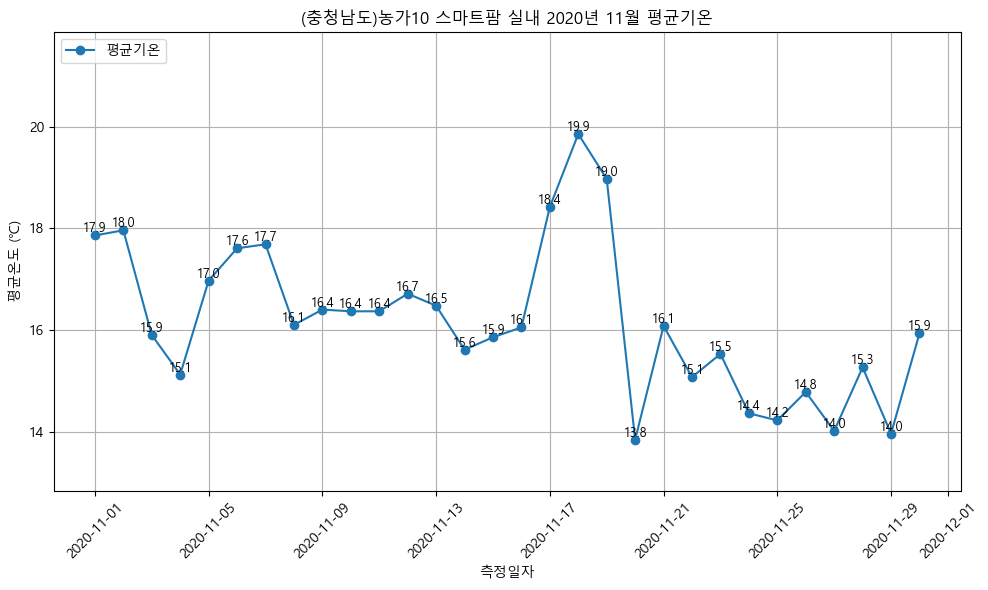

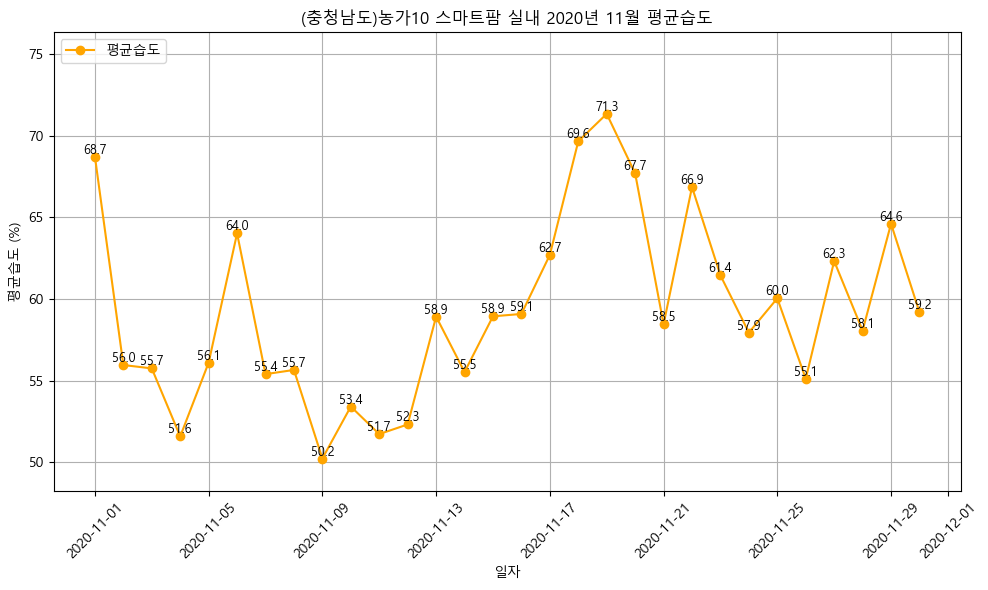

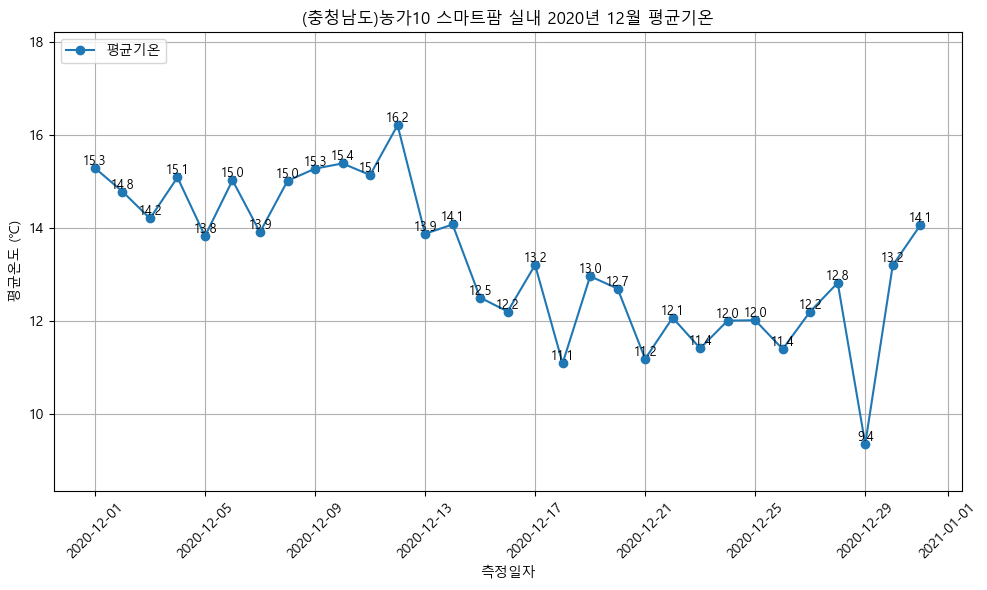

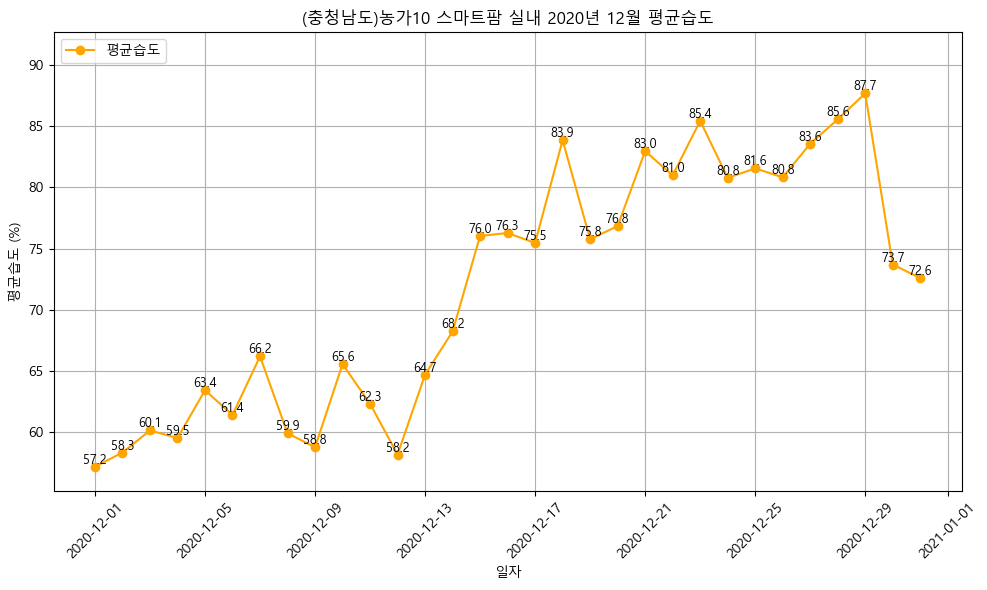

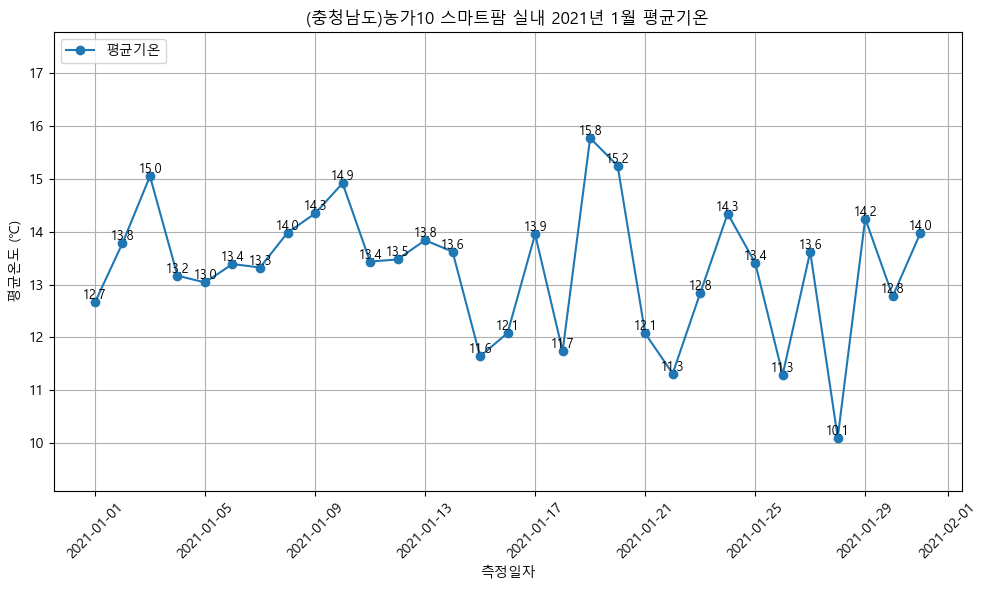

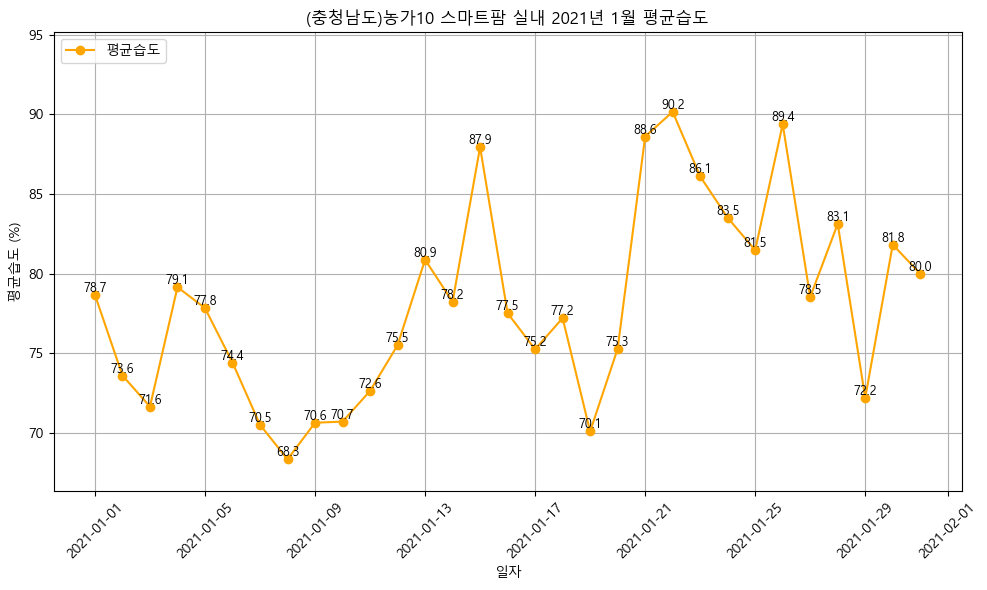

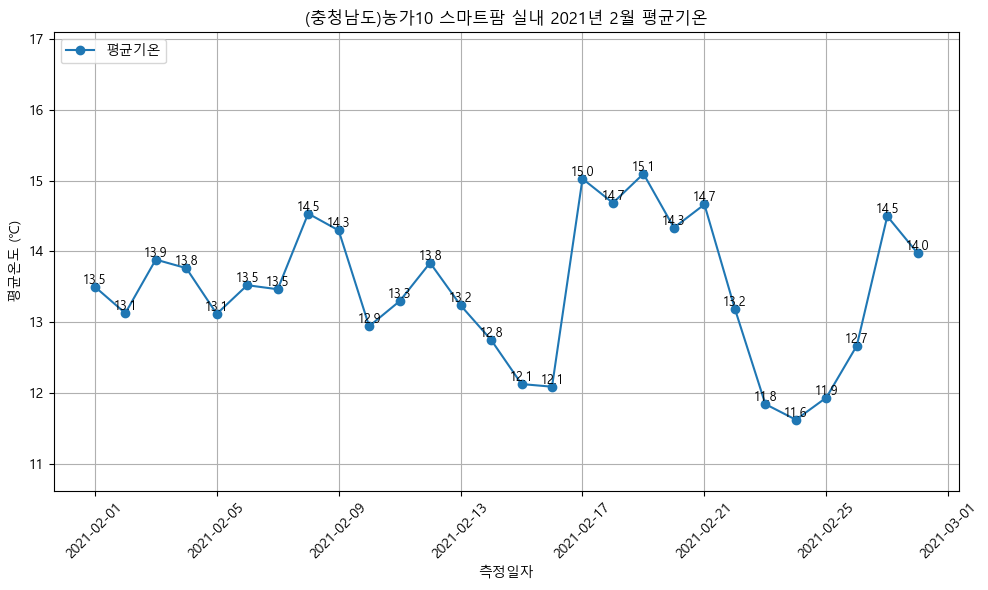

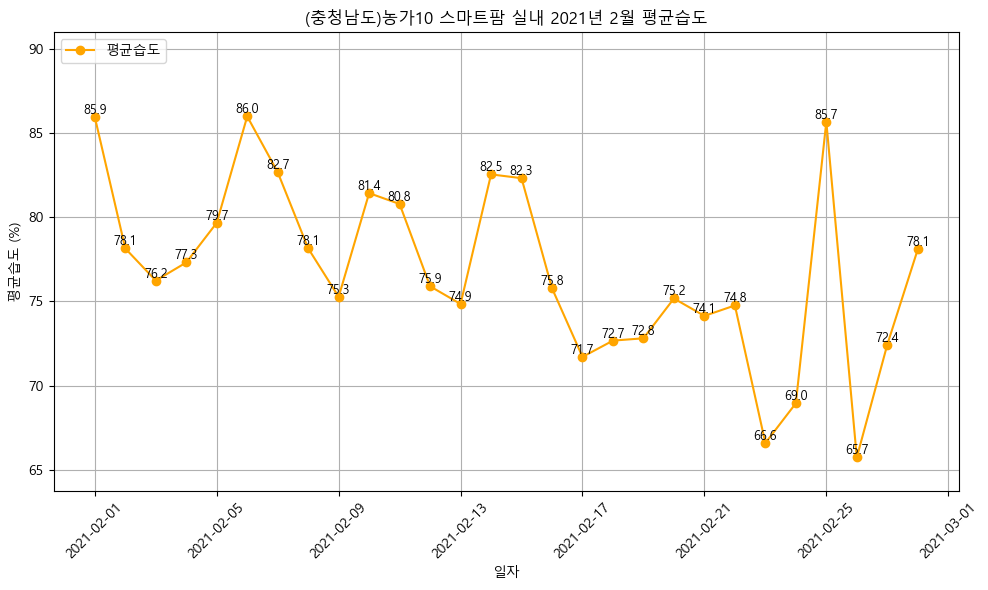

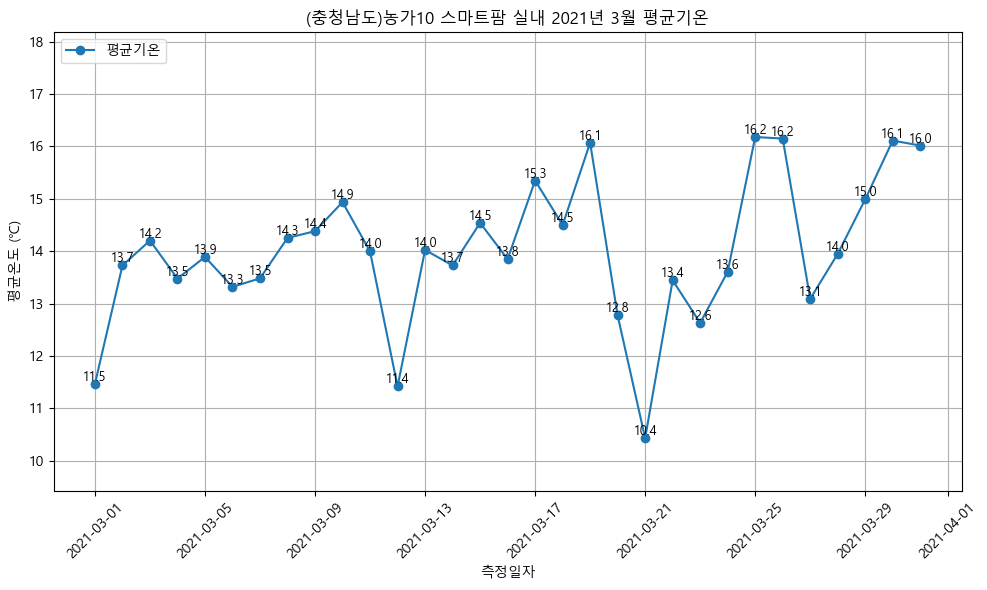

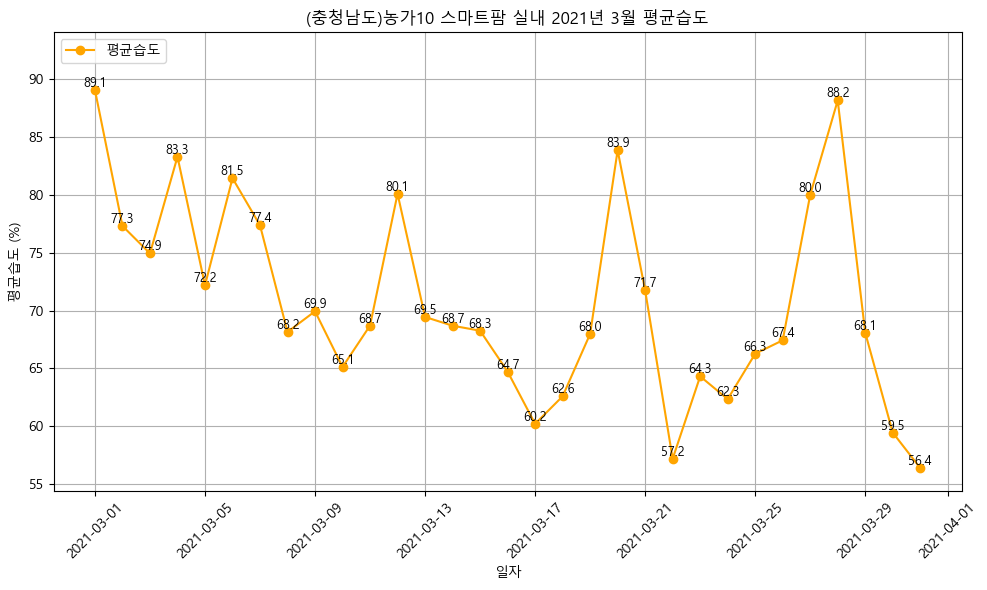

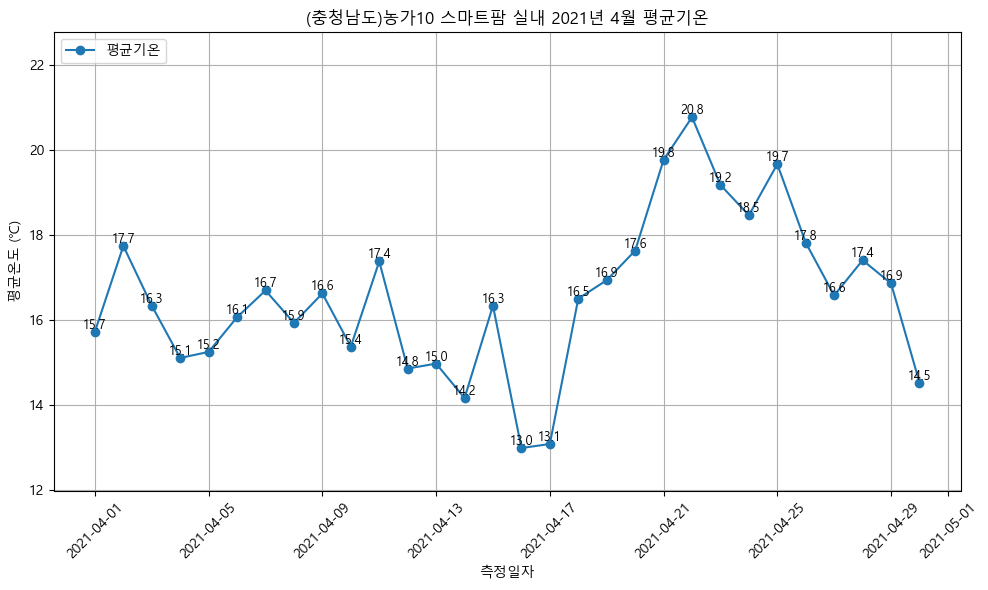

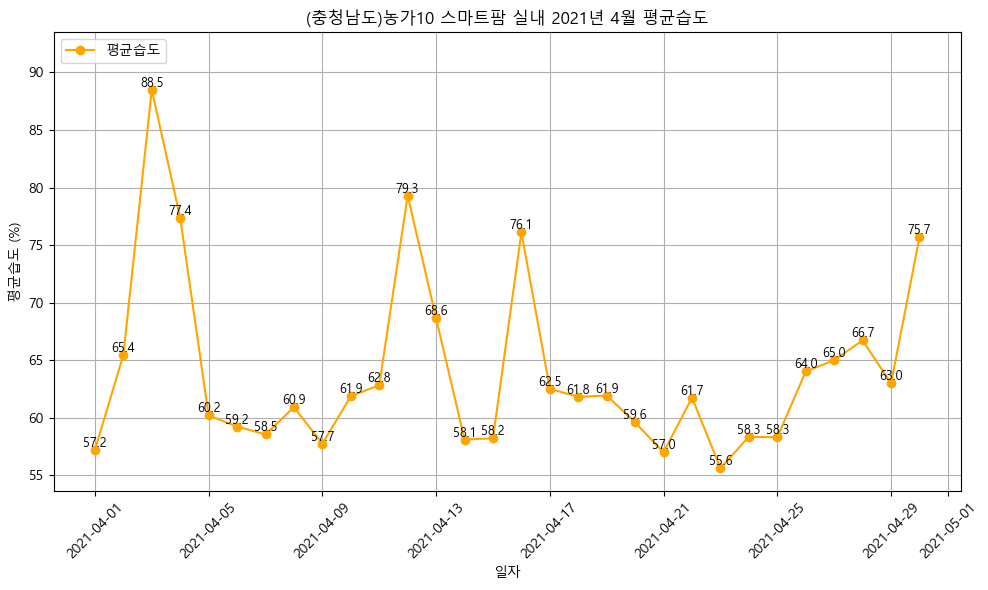

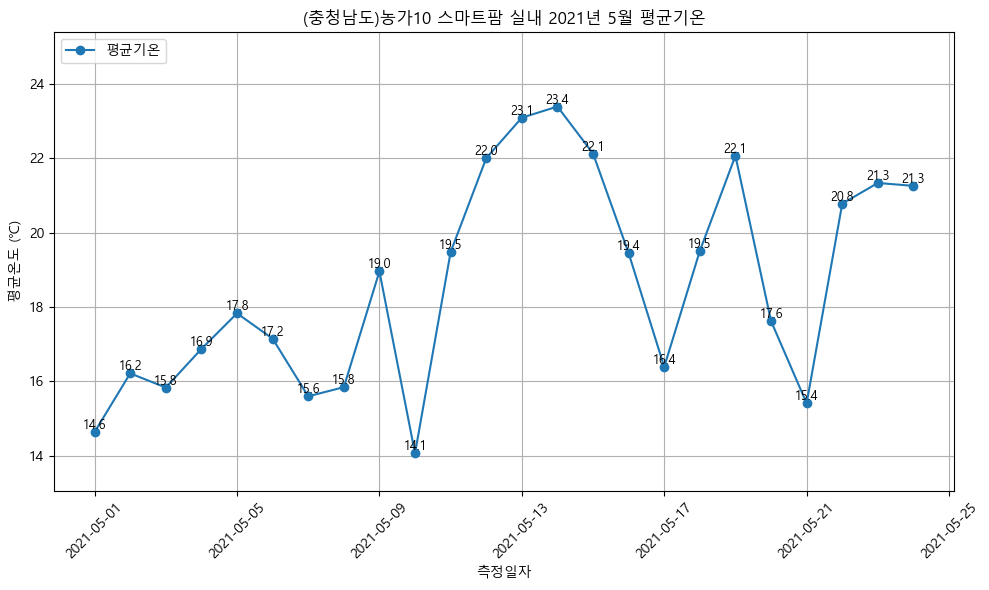

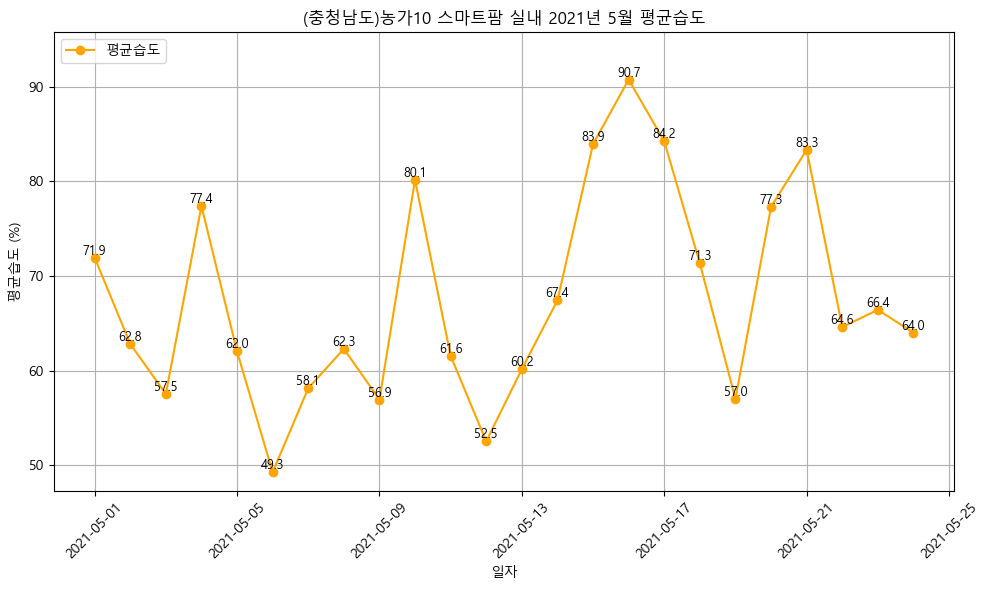

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 처리 및 시각화를 위한 함수 정의
def visualize_farm_data(df, farm_number):
    # '측정시간' 칼럼을 datetime 형식으로 변환
    df['측정시간'] = pd.to_datetime(df['측정시간'])
    
    # 해당 농가의 데이터 필터링
    farm_data = df[df['농가명'] == farm_number].copy()  # 경고 해결을 위해 .copy() 사용
    
    if farm_data.empty:
        print(f"{farm_number}번 농가에 해당하는 데이터가 없습니다.")
        return

    # '연도-월' 및 '일자' 정보 추가
    farm_data.loc[:, '연도-월'] = farm_data['측정시간'].dt.to_period('M')
    farm_data.loc[:, '일자'] = farm_data['측정시간'].dt.date

    # 월별로 일자별 평균 온도와 습도를 계산
    for month in farm_data['연도-월'].unique():
        month_data = farm_data[farm_data['연도-월'] == month]
        daily_avg = month_data.groupby('일자').agg({
            '온도_내부': 'mean',
            '상대습도_내부': 'mean'
        }).reset_index()
        
        # 연도와 월을 숫자로 분리
        year = month.year
        month_str = month.month  # 월을 숫자로 변환
        
        # 일자별 내부 온도 그래프 시각화
        plt.figure(figsize=(10, 6))
        plt.plot(daily_avg['일자'], daily_avg['온도_내부'], marker='o',label='평균기온')
        plt.title(f'(충청남도)농가{farm_number} 스마트팜 실내 {year}년 {month_str}월 평균기온')
        plt.xlabel('측정일자')
        plt.ylabel('평균온도 (℃)')
        plt.ylim(bottom=daily_avg['온도_내부'].min() - 1, top=daily_avg['온도_내부'].max() + 2)
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.xticks(rotation=45)
        
        # 각 점 위에 수치 추가
        for i in range(len(daily_avg)):
            plt.text(daily_avg['일자'][i], daily_avg['온도_내부'][i], 
                     f'{daily_avg["온도_내부"][i]:.1f}', 
                     ha='center', va='bottom', fontsize=9, color='black')
        
        plt.tight_layout()
        
        # 이미지를 파일로 저장 (예: farm_1_2023_9_temperature.png)
        plt.savefig(f'농가{farm_number}_{year}_{month_str}_평균기온.png')
        plt.show()
        
        # 일자별 상대습도 그래프 시각화
        plt.figure(figsize=(10, 6))
        plt.plot(daily_avg['일자'], daily_avg['상대습도_내부'], marker='o',label='평균습도', color='orange')
        plt.title(f'(충청남도)농가{farm_number} 스마트팜 실내 {year}년 {month_str}월 평균습도')
        plt.xlabel('일자')
        plt.ylabel('평균습도 (%)')
        plt.ylim(bottom=daily_avg['상대습도_내부'].min() - 2, top=daily_avg['상대습도_내부'].max() + 5)
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.xticks(rotation=45)
        
        # 각 점 위에 수치 추가
        for i in range(len(daily_avg)):
            plt.text(daily_avg['일자'][i], daily_avg['상대습도_내부'][i], 
                     f'{daily_avg["상대습도_내부"][i]:.1f}', 
                     ha='center', va='bottom', fontsize=9, color='black')
        
        plt.tight_layout()
        
        # 이미지를 파일로 저장 (예: farm_1_2023_9_humidity.png)
        plt.savefig(f'농가{farm_number}_{year}_{month_str}_평균습도.png')
        plt.show()

# 예시 사용
farm_number = 10  # 1번 농가의 데이터를 시각화
visualize_farm_data(df, farm_number)

In [41]:
df2

,id,도,시군,품목,작기,농가명,조사일자,개체번호,초장,엽수,엽장,엽폭,엽병장,관부직경,화방별착과수
0,1,경남,거창,딸기,1,51,2020-10-08,1,24.0,4.0,6.50,4.6,16.0,13.220,0
1,2,경남,거창,딸기,1,51,2020-10-08,2,22.8,5.0,7.50,5.3,9.0,12.410,0
2,3,경남,거창,딸기,1,51,2020-10-08,3,25.5,5.0,7.40,5.6,8.6,14.420,0
3,4,경남,거창,딸기,1,51,2020-10-08,4,30.0,5.0,9.60,6.3,13.7,15.730,0
4,5,경남,거창,딸기,1,51,2020-10-15,1,24.0,5.0,10.40,6.7,8.7,12.270,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17587,17588,충북,청주,딸기,1,1,2021-05-25,4,23.0,24.0,11.70,10.2,7.2,15.880,0
17588,17589,충북,청주,딸기,1,1,2021-05-25,4,30.0,22.0,14.95,8.4,13.1,15.555,0
17589,17590,충북,청주,딸기,1,1,2021-05-25,4,30.0,22.0,14.95,8.4,13.1,15.555,0
17590,17591,충북,청주,딸기,1,1,2021-05-25,4,30.0,22.0,14.95,8.4,13.1,15.555,0


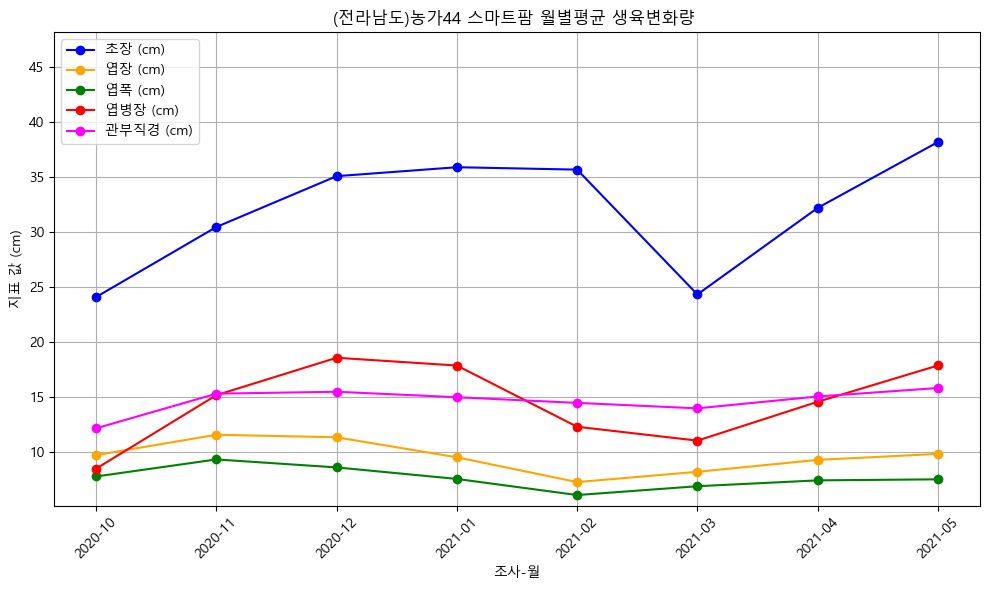

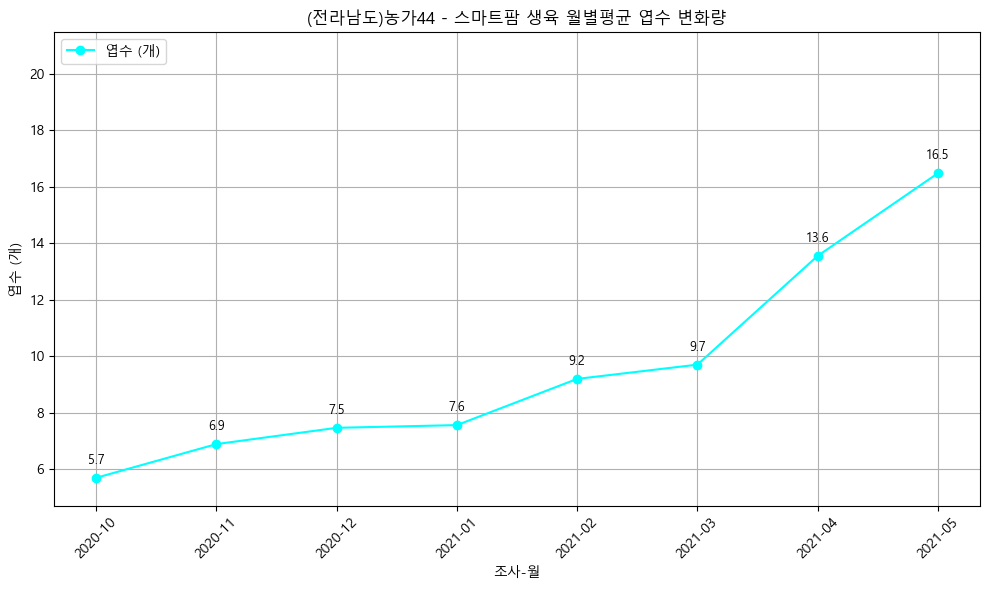

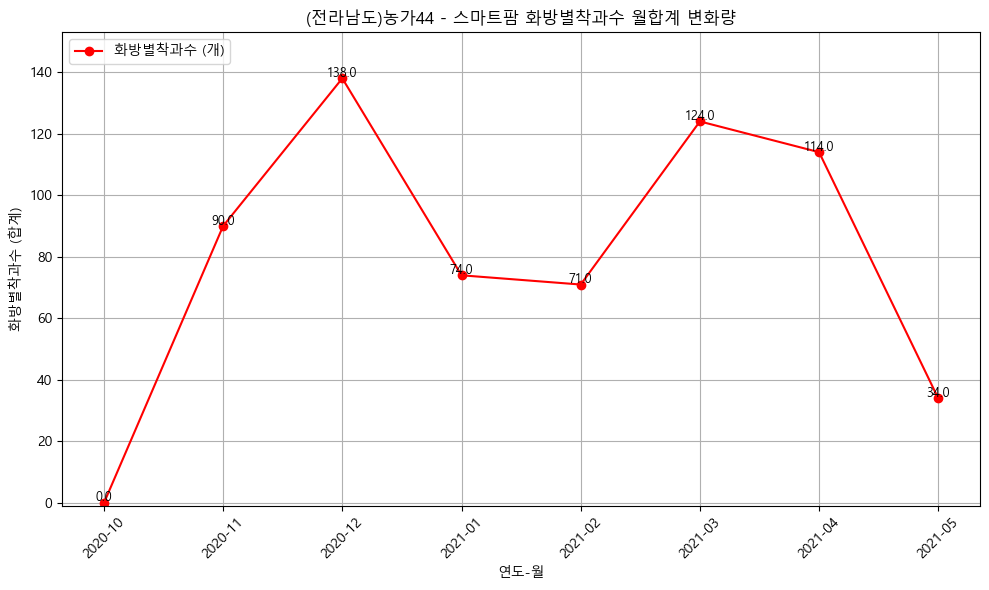

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 처리 및 시각화를 위한 함수 정의
def visualize_farm_growth(df, farm_number):
    # '조사일자'를 datetime 형식으로 변환
    df['조사일자'] = pd.to_datetime(df['조사일자'])
    
    # 해당 농가의 데이터 필터링
    farm_data = df[df['농가명'] == farm_number].copy()

    if farm_data.empty:
        print(f"{farm_number}번 농가에 해당하는 데이터가 없습니다.")
        return

    # 월별 평균을 계산 (조사일자의 연도와 월을 기준으로)
    farm_data['연도_월'] = farm_data['조사일자'].dt.to_period('M')
    monthly_avg = farm_data.groupby('연도_월').agg({
        '초장': 'mean',
        '엽수': 'mean',
        '엽장': 'mean',
        '엽폭': 'mean',
        '엽병장': 'mean',
        '관부직경': 'mean',
        '화방별착과수': 'sum'  # 화방별착과수는 합계로 계산
    }).reset_index()

    # 초장, 엽장, 엽폭, 엽병장, 관부직경의 월평균 변화를 나타내는 그래프
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_avg['연도_월'].astype(str), monthly_avg['초장'], marker='o', label='초장 (cm)',color='blue')
    plt.plot(monthly_avg['연도_월'].astype(str), monthly_avg['엽장'], marker='o', label='엽장 (cm)', color='orange')
    plt.plot(monthly_avg['연도_월'].astype(str), monthly_avg['엽폭'], marker='o', label='엽폭 (cm)', color='green')
    plt.plot(monthly_avg['연도_월'].astype(str), monthly_avg['엽병장'], marker='o', label='엽병장 (cm)', color='red')
    plt.plot(monthly_avg['연도_월'].astype(str), monthly_avg['관부직경'], marker='o', label='관부직경 (cm)', color='magenta')
    
    plt.title(f'(전라남도)농가{farm_number} 스마트팜 월별평균 생육변화량 ')
    plt.xlabel('조사-월')
    plt.ylabel('지표 값 (cm)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.ylim(bottom=monthly_avg[['초장', '엽장', '엽폭', '엽병장', '관부직경']].min().min() - 1, 
             top=monthly_avg[['초장', '엽장', '엽폭', '엽병장', '관부직경']].max().max() + 10)  # y축 공간 조정
    plt.legend(loc='upper left')  # 라벨을 그래프 왼쪽 위에 배치
    plt.tight_layout()
    plt.savefig(f'농장{farm_number}_생육월평균.png')
    plt.show()

    # 엽수의 월평균 변화를 나타내는 그래프
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_avg['연도_월'].astype(str), monthly_avg['엽수'], marker='o', label='엽수 (개)',color='cyan')
    # 각 점에 값을 표시
    for i, value in enumerate(monthly_avg['엽수']):
        plt.text(i, value + 0.5, f'{value:.1f}', ha='center', fontsize=9, color='black')

    plt.title(f'(전라남도)농가{farm_number} - 스마트팜 생육 월별평균 엽수 변화량')
    plt.xlabel('조사-월')
    plt.ylabel('엽수 (개)')
    plt.xticks(rotation=45)
    plt.ylim(bottom=monthly_avg['엽수'].min() - 1, top=monthly_avg['엽수'].max() + 5)  # y축 공간 조정
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'농가{farm_number}_엽수월평균.png')
    plt.show()

    # 화방별착과수의 월합계 변화를 나타내는 그래프
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_avg['연도_월'].astype(str), monthly_avg['화방별착과수'], marker='o',label='화방별착과수 (개)', color='red')
    # 각 점에 값을 표시
    for i, value in enumerate(monthly_avg['화방별착과수']):
        plt.text(i, value + 0.5, f'{value:.1f}', ha='center', fontsize=9, color='black')

    plt.title(f'(전라남도)농가{farm_number} - 스마트팜 화방별착과수 월합계 변화량')
    plt.xlabel('연도-월')
    plt.ylabel('화방별착과수 (합계)')
    plt.xticks(rotation=45)
    plt.ylim(bottom=monthly_avg['화방별착과수'].min() - 1, top=monthly_avg['화방별착과수'].max() + 15)  # y축 공간 조정
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'농가{farm_number}_착과수합계.png')
    plt.show()

# 예시 사용
farm_number = 44  # 예를 들어 1번 농가를 시각화
visualize_farm_growth(df2, farm_number)

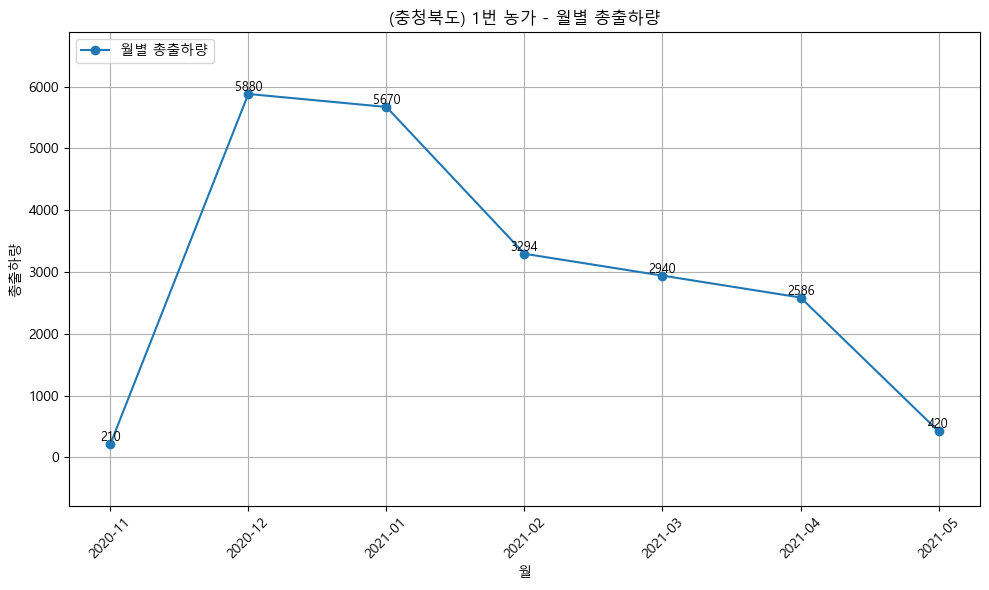

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# '출하일자'를 datetime 형식으로 변환
df3['출하일자'] = pd.to_datetime(df3['출하일자'])

# 농가명에 따른 월별 총출하량 시각화 함수 정의
def visualize_shipments_by_farm(farm_number):
    # 농가명으로 필터링
    farm_data = df3[df3['농가명'] == farm_number].copy()
    
    if farm_data.empty:
        print(f"{farm_number}번 농가에 해당하는 데이터가 없습니다.")
        return
    
    # 월별 총출하량 계산
    farm_data['연도-월'] = farm_data['출하일자'].dt.to_period('M')
    monthly_total = farm_data.groupby('연도-월')['총출하량'].sum().reset_index()

    # 월별 총출하량 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_total['연도-월'].astype(str), monthly_total['총출하량'], marker='o', label='월별 총출하량')

    # 각 점에 값 표시 (정수로 표시)
    for i, v in enumerate(monthly_total['총출하량']):
        plt.text(monthly_total['연도-월'][i].strftime('%Y-%m'), v, f'{int(v)}', ha='center', va='bottom', fontsize=9)

    plt.title(f'(충청북도) {farm_number}번 농가 - 월별 총출하량')
    plt.xlabel('월')
    plt.ylabel('총출하량')
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # y축 공간 조정
    plt.ylim(bottom=monthly_total['총출하량'].min() - 1000, top=monthly_total['총출하량'].max() + 1000)
    
    plt.tight_layout()
    plt.legend(loc='upper left')
    plt.savefig(f'농가{farm_number}_월별_총출하량.png')
    plt.show()

# 예시: 농가명 44번 데이터 시각화
visualize_shipments_by_farm(1)